In [1]:
import io
import json
import re
import requests
import time
from pdfminer.high_level import extract_text
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/09/12ata-r.e.-virtual-setembro-10-09-2020.pdf"
#sem quorum.
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/08/07ataa-r.e.-virtual-agosto-06-08-2020.pdf"
#sem quorum.
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/09/09ataa-r.e.-virtual-agosto-20-08-2020-3.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/10/ata-r.o.-15-10-19.pdf"
#########################################################################################################
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.soleneordinaria-05-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.o.-12-02-19.pdf"
url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-19-02-19.pdf"
####url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-26-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-12-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.extraordinaria-15-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-19-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-26-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-02-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-09-04-19.pdf"
###
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-16-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-23-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-30-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-07-05-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-14-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/mae-destaque-nova-limense-16-05-2019-3.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-21-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-28-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-04-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-11-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-18-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-25-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/08/ata-r.o.-02-07-19.pdf"


#"Ata: ['-r.o.-25-06-19.pdf'] NumeroPaginas: 26"       
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-25-06-19.pdf"
    
    
#"Ata: ['-r.o.-28-05-19-1.pdf'] NumeroPaginas: 28"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-28-05-19-1.pdf"


#"Ata: ['-r.o.-23-04-19.pdf'] NumeroPaginas: 26"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-23-04-19.pdf" 
    
    
#"Ata: ['-r.o.-11-06-19.pdf'] NumeroPaginas: 1"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-11-06-19.pdf"
    
#"Ata: ['-r.o.-02-04-19.pdf'] NumeroPaginas: 1"
#url= "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-02-04-19.pdf"    
    
#"Ata: ['-r.o.-12-02-19.pdf'] NumeroPaginas: 1
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.o.-12-02-19.pdf"
    


In [3]:
resposta =  requests.get(url)

In [4]:
with io.BytesIO(resposta.content) as abrir_pdf:
    text = extract_text(abrir_pdf)

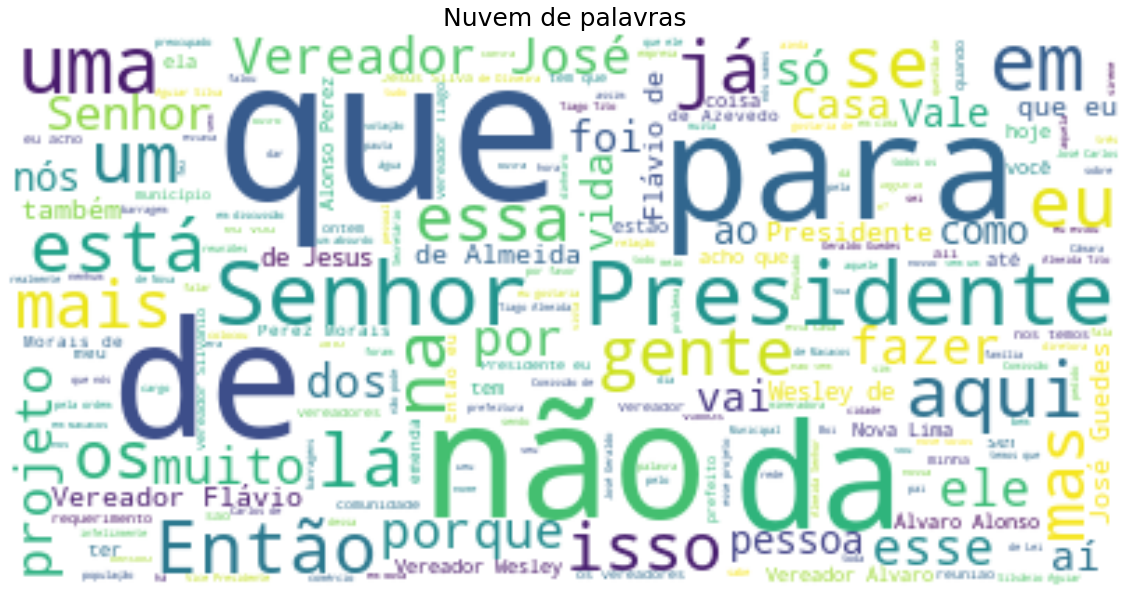

In [5]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 500, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(text,  'Nuvem de palavras')

In [6]:
text = text.rstrip().replace('\n', '').lower()

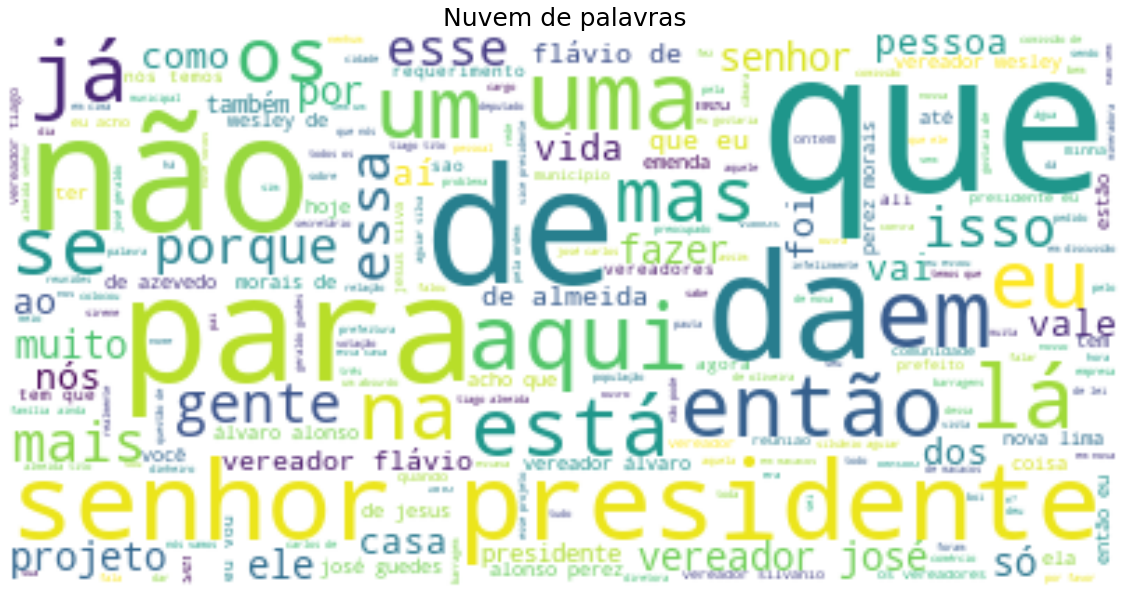

In [7]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 500, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(text,  'Nuvem de palavras')

In [8]:
#word_tokenize(text)

In [9]:
tokenizer_projetos2020 = RegexpTokenizer('\d*.\d*d*/\d*')
numero_projetos2020 = tokenizer_projetos2020.tokenize(text)
numero_projetos2020

['e/',
 ' 2019/2020',
 '1.752/2019',
 '1.767/2019',
 '1.736/2018',
 '2.298/2012',
 '1.736/2018',
 ' 1736/2018',
 '1.736/2018',
 '1.736/2018',
 '1.736/2018',
 '1.738/2018',
 's/',
 ' 27/05']

In [10]:
tokenizer_projetos2019 = RegexpTokenizer('\d*d*/\d*')
numero_projetos2019 = tokenizer_projetos2020.tokenize(text)
numero_projetos2019

['e/',
 ' 2019/2020',
 '1.752/2019',
 '1.767/2019',
 '1.736/2018',
 '2.298/2012',
 '1.736/2018',
 ' 1736/2018',
 '1.736/2018',
 '1.736/2018',
 '1.736/2018',
 '1.738/2018',
 's/',
 ' 27/05']

In [11]:
tokenizer_digit = RegexpTokenizer('^[ 0-9]+$')
digitos = tokenizer_digit.tokenize(text)
digitos

[]

In [46]:
tokens = word_tokenize(text)

with open('./pontuacao.txt','r',encoding='utf-8') as pontuacao_txt:
        pontuacao = pontuacao_txt.read()
               
with open('./stop_words_custom.txt', 'r', encoding='utf-8') as stop_words_custom_txt:
    stop_words_custom = stop_words_custom_txt.read()

with open('./nomes_remover.txt','r',encoding='utf-8') as nomes_remover_txt:
    nomes_remover = nomes_remover_txt.read()

stop_words = set(stopwords.words('portuguese'))

In [13]:
#len(tokens)

In [14]:
resultado1 = [resultado for resultado in tokens if resultado not in stop_words]

In [15]:
#print(len(resultado1))

In [16]:
resultado2 = [resultado1 for resultado1 in resultado1 if resultado1 not in pontuacao]

In [17]:
#print(len(resultado2))

In [18]:
resultado3 = [resultado2 for resultado2 in resultado2 if resultado2 not in numero_projetos2020]

In [19]:
#print(len(resultado3))

In [20]:
resultado4 = [resultado3 for resultado3 in resultado3 if resultado3 not in numero_projetos2019]

In [21]:
#print(len(resultado4))

In [22]:
resultado5 = [resultado4 for resultado4 in resultado4 if resultado4 not in nomes_remover]

In [23]:
#print(len(resultado5))

In [24]:
resultado6 = [resultado5 for resultado5 in resultado5 if resultado5 not in stop_words_custom]

In [25]:
print(len(resultado6))

2920


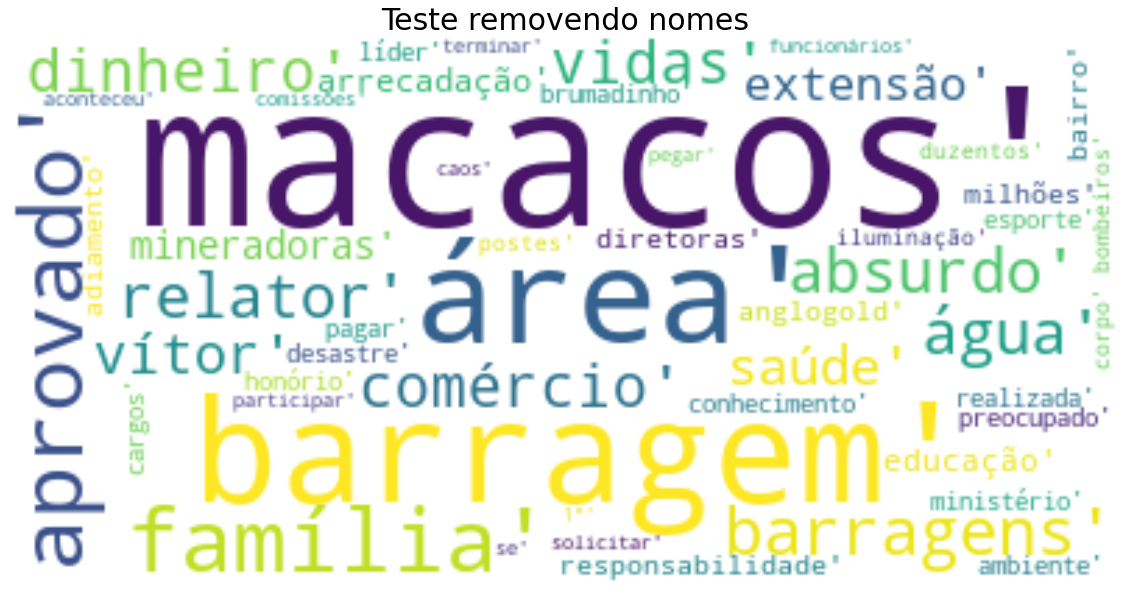

In [26]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 50, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 30)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
    #print(data)

show_wordcloud(resultado6,  'Teste removendo nomes')

In [27]:
fd = FreqDist(resultado6)

In [28]:
pesquisar= [fd for fd, _ in fd.most_common(5) if fd not in pontuacao]
pesquisar

['macacos', 'barragem', 'área', 'família', 'vítor']

In [29]:
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import json

In [30]:
url = 'https://www.dicionarioinformal.com.br/'

In [36]:
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
binary = FirefoxBinary('C:\\Program Files\\Mozilla Firefox\\firefox.exe')
driver = webdriver.Firefox(firefox_binary=binary, executable_path=r'C:\\geckodriver-v0.27.0-win64\\geckodriver.exe')

In [37]:
driver.get(url)
time.sleep(10)

In [39]:
significados = []
for i  in pesquisar:
    driver.refresh()
    time.sleep(5)
    driver.get(url)
    time.sleep(5)
    campo_exercicio = driver.find_element_by_id("buscar_input")
    campo_exercicio.send_keys(i)
    time.sleep(5)
    comfirmar = driver.find_element_by_id('buscar_input')
    comfirmar.send_keys(u'\ue007')
    time.sleep(5)
    definicao = driver.find_element_by_xpath("//div[@class='card-body card-padding card-body-di']")
    conteudo_definicao = definicao.get_attribute('outerHTML')
    sopa = BeautifulSoup(conteudo_definicao, 'html.parser')
    p = sopa.find(name='p')
    significados.append(i)
    significados.append(p)
    time.sleep(5)

In [40]:
significados

['macacos',
 <p class="light" style="font-size:12px">
 <a alt="Significado de macacos" href="/macacos/" title="Significado de macacos">Macacos</a> é um Substantivo, masculino plural  de <a alt="Significado de macaco" href="/macaco/" title="Significado de macaco">macaco</a>;<br/><a alt="Significado de macacos" href="/macacos/" title="Significado de macacos">Macacos</a> é um Adjetivo, masculino plural  de <a alt="Significado de macaco" href="/macaco/" title="Significado de macaco">macaco</a>;
 	            </p>,
 'barragem',
 <p class="light" style="font-size:12px">
 <a alt="Significado de barragem" href="/barragem/" title="Significado de barragem">Barragem</a> é um Substantivo, feminino singular ;
 	            </p>,
 'área',
 <p class="light" style="font-size:12px">
 <a alt="Significado de área" href="/%E1rea/" title="Significado de área">área</a> é um Substantivo, feminino singular ;
 	            </p>,
 'família',
 <p class="light" style="font-size:12px">
 <a alt="Significado de famí

In [41]:
driver.quit()